# Project: Investigate TMDB Movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

% matplotlib inline

- The purpose of this notebook to analyze and investigate the [imdb] dataset.The dataset was taken from the movie database (TMDB). The tmdb dataset consists of 10867 entries for different attributes that describe the different movie at each row.
- The dataset consists of the following attributes:
                1.id 
                2.imdb_id 
                3.popularity 
                4.budget
                5.revenue
                6.original_title 
                7.cast
                8.homepage
                9.director
                10.tagline
                11.keywords
                12.overview
                13.runtime
                14.genres
                15.production_companies
                16.release_date
                17.vote_count
                18.vote_average
                19.release_year
- The investigation process are going to start with data wrangling, Exploratory Data Analysis and conclusion processes.
- And the main goal is to respond to some of the below question and build some relation between the data inside the dataset.
- In this report I will explore the following questions:
    1. Which genres are most popular from year to year?
    2. What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,137999939.280026,1.392446e+09,NaN,NaN,NaN,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,5/13/15,6185,7.1,2015,137999939.280026,3.481613e+08,NaN,NaN,NaN,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,3/18/15,2480,6.3,2015,101199955.472019,2.716190e+08,NaN,NaN,NaN,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,12/15/15,5292,7.5,2015,183999919.040035,1.902723e+09,NaN,NaN,NaN,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,4/1/15,2947,7.3,2015,174799923.088033,1.385749e+09,NaN,NaN,NaN,NaN


# 1. Early steps to inspect the dataset

In [3]:
# First steps to inspect the dataset - shape
no_rows = len(df.index)
no_columns = len(df.columns)
print('Number of rows = ', no_rows)
print('Number of columns = ', no_columns)
print('\n\n')

Number of rows =  10866
Number of columns =  25





# 2. Checking the issues inside the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8040 non-null object
keywords                9374 non-null object
overview                10860 non-null object
runtime                 10866 non-null object
genres                  10843 non-null object
production_companies    9845 non-null object
release_date            10858 non-null object
vote_count              10866 non-null object
vote_average            10865 non-null object
release_year            10866 non-null object
budget_adj             

- 25 different columns where the last 4 columns are (unnamed) and have NULL values. So they need to be removed, Issue #1

In [5]:
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies', 'release_date',
       'vote_average', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

- After removing the last 4 columns - we still have 11 columns that contain NUll values - Issue #2

In [6]:
sum(df.duplicated())

1

- There is one row which is duplicated - Issue #3

# 3 Solving and cleaning the issue found

- Solving the 4 unnamed columns out of the 25 columns

In [7]:
df.drop(df.columns[[21, 22, 23, 24]], axis=1, inplace=True)
len(df.columns)

21

- Issue #2 - Deal with NUll values inside imdb_id columns

In [8]:
df_clean = df.copy()
for column in df_clean:
    df_clean.drop(df_clean.loc[df_clean[column].isnull()].index, inplace=True)
df_clean.shape

(1991, 21)

- Here I have tried to generate a full and complete dataset with no NULLS.
However the dataset is now considered to be clean without NULL values, there is a drawback that the number of
samples (rows) become small and might not give us a good representation of data.

- Issue #3 -Duplicates

In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8039 non-null object
keywords                9373 non-null object
overview                10859 non-null object
runtime                 10865 non-null object
genres                  10842 non-null object
production_companies    9844 non-null object
release_date            10857 non-null object
vote_count              10865 non-null object
vote_average            10864 non-null object
release_year            10865 non-null object
budget_adj             

- Here I have return back to the dataframe with NUlls to remove the nulls based on the question
I will answer in the next section.

<a id='eda'></a>
## Exploratory Data Analysis


# 1. Which genres are most popular from year to year ?

In [10]:
df_Q1 = df[['genres', 'release_year']]
df_Q1.head()
df_Q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
genres          10842 non-null object
release_year    10865 non-null object
dtypes: object(2)
memory usage: 254.6+ KB


In [11]:
# Apply some cleaning steps here.
df_Q1.dropna()
df_Q1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
genres          10842 non-null object
release_year    10865 non-null object
dtypes: object(2)
memory usage: 254.6+ KB


In [12]:
df_Q1['genres'].value_counts()

Comedy                                                711
Drama                                                 711
Documentary                                           310
Drama|Romance                                         288
Comedy|Drama                                          279
Comedy|Romance                                        266
Horror|Thriller                                       258
Horror                                                251
Comedy|Drama|Romance                                  220
Drama|Thriller                                        138
Comedy|Family                                         102
Action|Thriller                                        99
Drama|Comedy                                           92
Thriller                                               91
Animation|Family                                       90
Crime|Drama|Thriller                                   80
Crime|Drama                                            74
Comedy|Horror 

- From the above quick analysis, I deduced that I have to separate the genres based on '|'

Text(0.5,1,'Distribution of genres types among dataset')

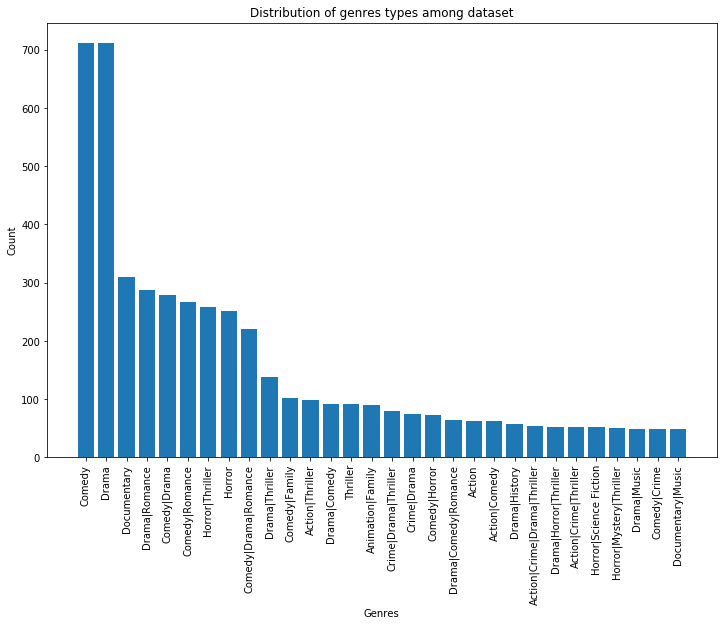

In [13]:
#Distribution of genres in the dataset
genres = df_Q1['genres'].value_counts()[:30]
fig, ax1 = plt.subplots(1,1,figsize = (12,8))
ax1.bar(np.arange(len(genres))+0.5, genres)
ax1.set_xticks(np.arange(len(genres))+0.5)
_ = ax1.set_xticklabels(genres.index, rotation = 90)
ax1.set_ylabel('Count')
ax1.set_xlabel('Genres')
ax1.set_title('Distribution of genres types among dataset')

- This plot shows a sample of 30 different genres among the dataset before spearating the genres into 
separate entities. And it shows that Comdey, Drama and Documentay are the most popular genres.

In [14]:
# Check the type o fthe 
genres.dtype
df_Q1['genres'] = df_Q1['genres'].astype(str) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- Stating from here, I have returned to depend on the clean dateframe because the cleaning reflect on the
feasibility of the data inside both columns (genres and release_year)

In [15]:
# Extract different genres frm the columns 'genres'
all_genres = np.unique(list(chain(*df_clean['genres'].map(lambda x: x.split('|')).tolist())))

In [16]:
all_genres

array([' a group of teenagers pull a mean prank', '106', '121', '83', '85',
       '90', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], 
      dtype='<U39')

- Based on this extraction, It is found that there are some entry in the ['genres'] columns that refer
to a physical genre of a movie so it has to be dropped.

In [17]:
df_clean.drop(df_clean[df_clean['genres'] == '106'].index, inplace=True)
df_clean.drop(df_clean[df_clean['genres'] == '121'].index, inplace=True)
df_clean.drop(df_clean[df_clean['genres'] == '83'].index, inplace=True)
df_clean.drop(df_clean[df_clean['genres'] == '85'].index, inplace=True)
df_clean.drop(df_clean[df_clean['genres'] == '90'].index, inplace=True)
df_clean.drop(df_clean[df_clean['genres'] == ' a group of teenagers pull a mean prank'].index, inplace=True)

In [18]:
all_genres = np.unique(list(chain(*df_clean['genres'].map(lambda x: x.split('|')).tolist())))

In [19]:
all_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], 
      dtype='<U15')

- Now this is a list of physical genres

In [20]:
#Create new columns in dataframe [df_Q1] with the new genres
for gen in all_genres:
    if len(gen)>1:
        df_Q1[gen]= df_Q1['genres'].map(lambda finding: 1.0 if gen in finding else 0)
df_Q1.sample(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,genres,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
4118,Animation|Adventure|Family,2002,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4458,Drama,2012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5866,Family|Fantasy|Comedy,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10765,Drama|Romance,1978,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5582,Drama,2013,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_Q1.drop(['genres'],axis=1)

,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2015,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2015,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2015,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2015,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,2015,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,2015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2015,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


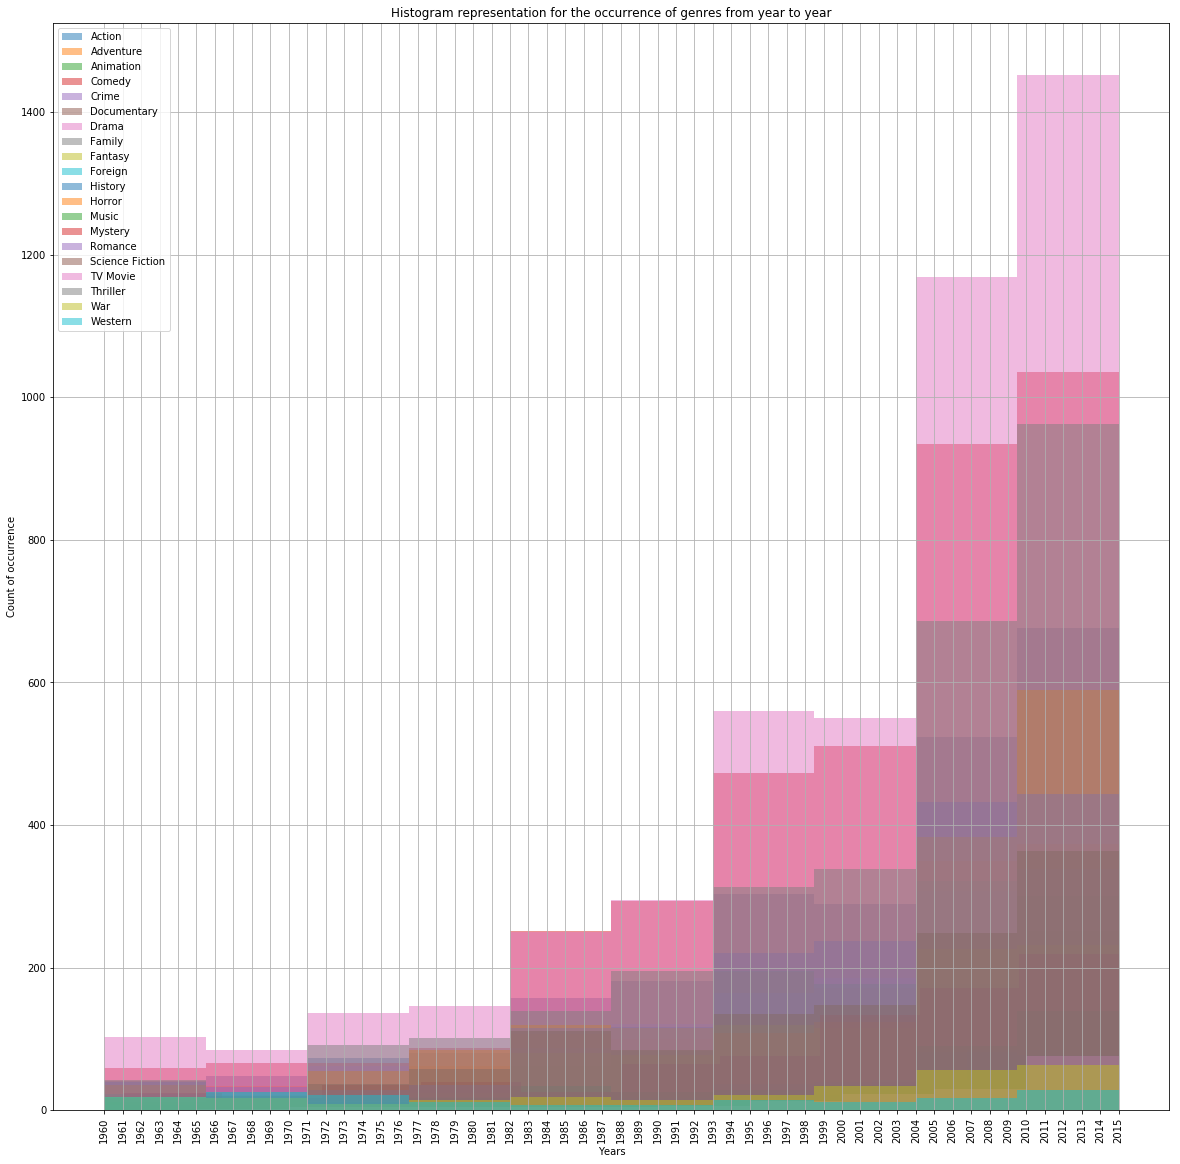

In [22]:
for gen in all_genres:
    df_Q1[df_Q1[gen]==1.0]["release_year"].hist(alpha=0.5,xrot = 90, figsize=(20,20), label = gen)
    plt.legend()
    plt.ylabel('Count of occurrence')
    plt.xlabel('Years')
    plt.title('Histogram representation for the occurrence of genres from year to year')

- This plot show the distribution of the occurence of various genres along the line of the years interval. Showing that the Drama is most popular genre from year to year  

In [23]:
#Another proof beside the the above plot
print('Count of comedy movies in the list', sum(df_Q1['Comedy'] == 1))
print('Count of Romance movies in the list', sum(df_Q1['Romance'] == 1))
print('Count of Drama movies in the list', sum(df_Q1['Drama'] == 1))
print('Count of Action movies in the list', sum(df_Q1['Action'] == 1))


Count of comedy movies in the list 3778
Count of Romance movies in the list 1704
Count of Drama movies in the list 4745
Count of Action movies in the list 2375


# 2. What kinds of properties are associated with movies that have high revenues?

In [24]:
df_Q1['release_year'].dtype

dtype('O')

- Quick analysis about the revenue column

In [25]:
df_Q2 = df_clean.copy()
df_Q2['revenue'].describe()

count    1.985000e+03
mean     1.155089e+08
std      2.205991e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.583662e+07
75%      1.279066e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [26]:
df_Q2 = df_Q2[['budget','revenue']]
df_Q2.head()

,budget,revenue
0,150000000,1513528810
1,150000000,378436354
2,110000000,295238201
3,200000000,2068178225
4,190000000,1506249360


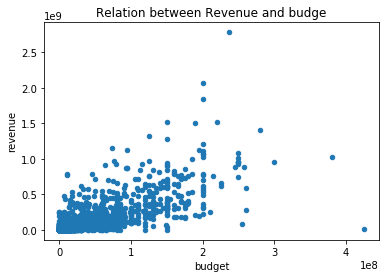

In [27]:
df_Q2.plot(x='budget',y='revenue',kind = 'scatter',title = 'Relation between Revenue and budge')


- This plot to show the relation between the budget and revnue and we can see here that there is somehow linear relation between the revenue and budget.

<a id='conclusions'></a>
## Conclusions

1. Regarding the first question and from the above analysis. It is found that the 'Drama' genre was
the most popular genre from year to year acroos the intervnal from (1960 to 2015). However it was not the top genre in the whole interval but it was the main dominant across the mentioned interval.
After that there were different genre beside 'Drama' like 'Comdey', 'Action' and 'Romance' who were also popular.

2. And Regarding the second question which is about the factor the affect the good revenue. I made my analysis
based on the budget factor and its affect on the the total revenue of the movie. At it is found that the movies
with low budget always produce low revenue. And the high revenue are always combined with the medium and high
budget movies

Limitation found during data analysis: 
    1. First, the dataset contains alot of 'Null' values that reduce dramtically the size of the data which 
    could enhace the result if it were exist.
    2. The 'genres' column required alot of maniplulations to separate it into different genres for better
    analysis and representtion.
    3. Some columns would be beneficial if it were well organized. Like the 'cast' column if it show 
    explicitly who is main hero, so I could base some analysis related to the revenue.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0